In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import os
import pandas as pd

matplotlib.matplotlib_fname()

'C:\\Users\\2-20\\Desktop\\DMF\\3rd_project\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [29]:
# 설치된 폰트 목록 출력
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'NanumGothic' in font:
        print(font)

C:\Users\2-20\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf


In [30]:
# CSV 파일 읽기
file_path = '시청주체/스마트폰 장르별 시청시간.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 데이터 미리보기
print(data.head())

  Unnamed: 0   Unnamed: 1          합계          전체     13-19세         남자  \
0    조사모집단 수  조사모집단 수 (명)           -  33,356,810  1,957,659  1,119,686   
1        총합계        Total  426,443.70  320,867.46      8,507   4,725.97   
2         교육        Total      144.98       54.46          5       0.00   
3        NaN          vod      144.98       54.46          5       0.00   
4         기타        Total      497.49      295.95          0       0.00   

         여자     20-29세       남자.1       여자.1  ...       여자.2     40-49세  \
0   837,973  3,513,818  1,911,893  1,601,925  ...  2,237,189  6,864,234   
1  3,781.32     22,859  14,618.92   8,240.22  ...  13,413.48     81,469   
2      4.78          0       0.00       0.00  ...       0.00          8   
3      4.78          0       0.00       0.00  ...       0.00          8   
4      0.00          5       5.43       0.00  ...       2.01        146   

        남자.3       여자.3     50-59세       남자.4       여자.4     60-69세  \
0  3,497,364  3,366,870  8,

In [31]:
# 열 이름을 정리
data.columns = ['장르', '타입', '합계', '전체', '13-19세', '남자_13-19세', '여자_13-19세', '20-29세', '남자_20-29세', '여자_20-29세', 
                '30-39세', '남자_30-39세', '여자_30-39세', '40-49세', '남자_40-49세', '여자_40-49세', 
                '50-59세', '남자_50-59세', '여자_50-59세', '60-69세', '남자_60-69세', '여자_60-69세']

# 특정 장르만 선택
genres = ['총합계', '드라마&영화', '보도', '스포츠', '오락']

# 장르별 시청시간 데이터 추출 (Total 값만 선택)
df = data[data['타입'] == 'Total']

# 필요한 열만 선택 (합계와 연령대별 시청시간)
df = df[['장르', '전체', '13-19세', '20-29세', '30-39세', '40-49세', '50-59세', '60-69세']]

# 숫자 형식으로 변환 (쉼표 제거)
df.iloc[:, 1:] = df.iloc[:, 1:].replace(',', '', regex=True).astype(float)

# 장르 필터링
df_filtered = df[df['장르'].isin(genres)]

# 데이터 확인
print(df_filtered)


        장르         전체  13-19세   20-29세   30-39세   40-49세   50-59세   60-69세
1      총합계  320867.46  8507.0  22859.0  28653.0  81469.0  87199.0  92180.0
7   드라마&영화   66009.41   756.0   6730.0   4577.0  19019.0  23304.0  11623.0
10      보도  104793.74   477.0   2265.0   6823.0  20165.0  27974.0  47089.0
13     스포츠   16741.37   340.0   1466.0   1130.0   7492.0   3032.0   3280.0
19      오락   118625.0  6397.0  11786.0  14829.0  30965.0  28836.0  25813.0


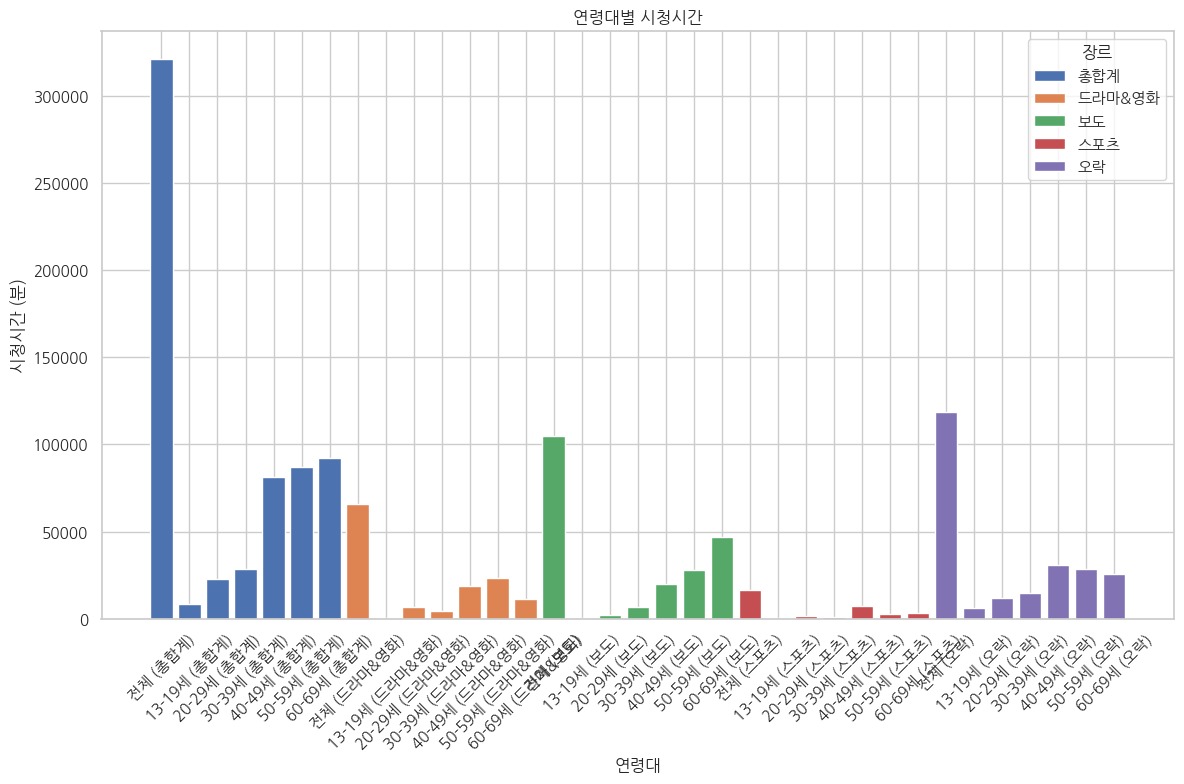

In [32]:
# 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 장르 목록을 정의 (예를 들어)
genres = df_filtered['장르'].unique()

# 시각화 설정
plt.figure(figsize=(12, 8))

# 연령대별 시청시간을 시각화
for genre in genres:
    genre_data = df_filtered[df_filtered['장르'] == genre]
    genre_data = genre_data.melt(id_vars='장르', var_name='연령대', value_name='시청시간')

    # 막대 그래프
    plt.bar(genre_data['연령대'] + ' (' + genre + ')', genre_data['시청시간'], label=genre)

# 그래프 제목 및 레이블
plt.title('연령대별 시청시간')
plt.xlabel('연령대')
plt.ylabel('시청시간 (분)')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='장르')
plt.tight_layout()

# 그래프 표시
plt.show()

In [33]:
# Total 타입만 선택
df = data[data['타입'] == 'Total']

# 필요한 열만 선택 (1020 세대의 시청시간)
df_1020 = df[['장르', '13-19세', '20-29세']]

# 숫자 형식으로 변환 (쉼표 제거)
df_1020.iloc[:, 1:] = df_1020.iloc[:, 1:].replace(',', '', regex=True).astype(float)

# 장르 필터링
genres = ['총합계', '드라마&영화', '보도', '스포츠', '오락']
df_1020_filtered = df_1020[df_1020['장르'].isin(genres)]

# 데이터 확인
print(df_1020_filtered)

        장르  13-19세   20-29세
1      총합계  8507.0  22859.0
7   드라마&영화   756.0   6730.0
10      보도   477.0   2265.0
13     스포츠   340.0   1466.0
19      오락  6397.0  11786.0


C:\Users\2-20\AppData\Local\Temp\ipykernel_17536\3017860842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1020.iloc[:, 1:] = df_1020.iloc[:, 1:].replace(',', '', regex=True).astype(float)


C:\Users\2-20\AppData\Local\Temp\ipykernel_17536\1643180116.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['1020 합계'] = df_filtered['13-19세'] + df_filtered['20-29세']


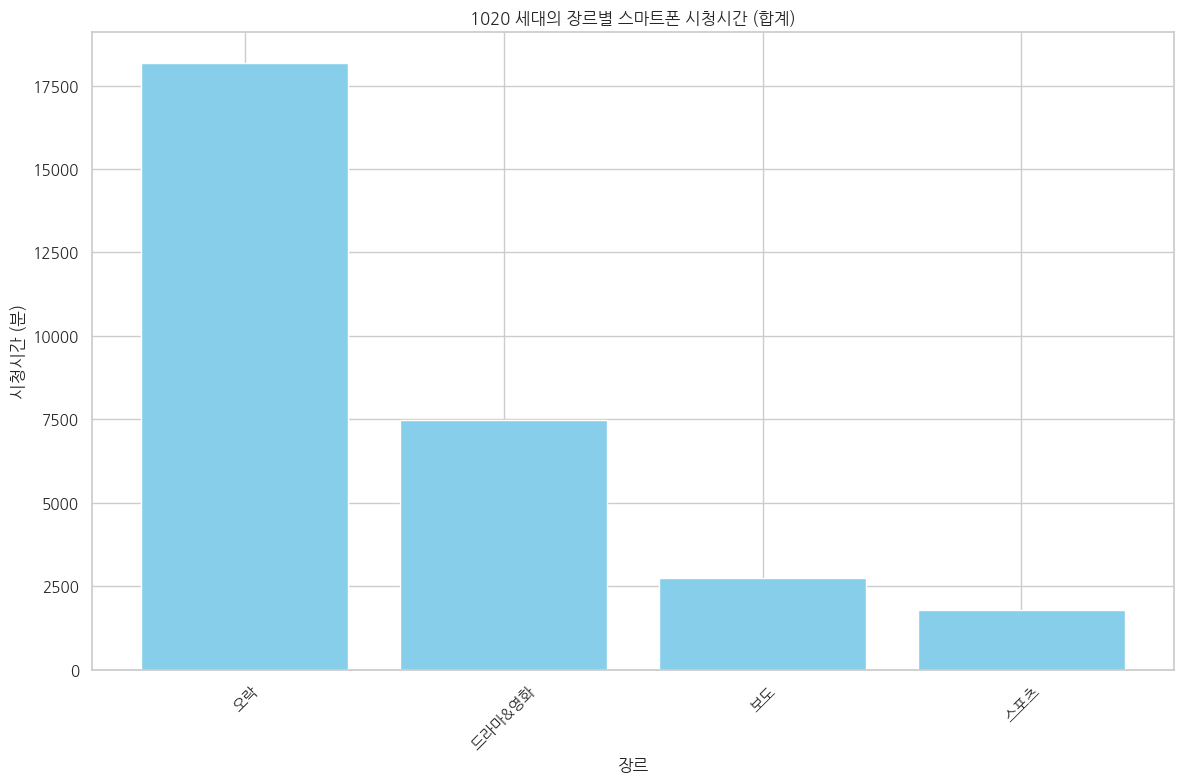

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# '총합계' 제거
df_filtered = df_1020_filtered[df_1020_filtered['장르'] != '총합계']

# '1020' 연령대 시청시간 합산
df_filtered['1020 합계'] = df_filtered['13-19세'] + df_filtered['20-29세']

# 1020 합계 기준으로 정렬
df_sorted = df_filtered[['장르', '1020 합계']].sort_values(by='1020 합계', ascending=False)

# 시각화 설정
plt.figure(figsize=(12, 8))

# 막대 그래프
bars = plt.bar(df_sorted['장르'], df_sorted['1020 합계'], color='skyblue')

# 그래프 제목 및 축 설정
plt.title('1020 세대의 장르별 스마트폰 시청시간 (합계)')
plt.xlabel('장르')
plt.ylabel('시청시간 (분)')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.savefig('1020 세대의 장르별 스마트폰 시청시간 (합계).png')
plt.show()